In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2022.parquet
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2021.parquet
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.parquet
/kaggle/input/flight-delay-dataset-20182022/Airlines.csv
/kaggle/input/flight-delay-dataset-20182022/readme.md
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2022.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2020.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2020.parquet
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2019.csv
/kaggle/input/flight-delay-dataset-20182022/readme.html
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2021.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2019.parquet
/kaggle/input/flight-delay-dataset-20182022/raw/Flights_2018_7.csv
/kaggle/input/flight-delay-dataset-20182022/ra

# Introduction
### Why we chose this dataset:
* We will be using this dataset to effectively and accurately predict length of time for flight delays. We will use various regression and machine learning techniques to learn from the training data and then test our prediction models with our test data.

### What we will be doing with this dataset:
* We chose the given dataset as it is both rich and robust. The size allows us to adjust various factors in order to observe common phenomena. The number of columns allows us to explore which variables affect flight delays; whereas, the number of rows ensure we have enough data to make good judgements.

### What results we hope to achieve:
* We aim to predict the length of flight delays with high confidence.

### Section 1: Load data from CSV into Pandas Dataframe


In [2]:
#We are only going to use 2018 data to make our dataset manageable. 2020-2022 data is influenced by COVID, and using 2018 and 2019 together
#generates 2 million + rows to work with which is not feasible in a collaborative notebook with all of us working in it. 

df_flights_2018 = pd.read_csv("/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.csv")
df_flights_2018.dropna(inplace = True)
#df_flights_2019 = pd.read_csv("/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2019.csv")
#df_flights_2019.dropna(inplace = True)

#let's look at our code after running this
#let's look at the code
print(df_flights_2018.head())
print(df_flights_2018.info())

   FlightDate            Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2018-01-23  Endeavor Air Inc.    ABY  ATL      False     False        1202   
1  2018-01-24  Endeavor Air Inc.    ABY  ATL      False     False        1202   
2  2018-01-25  Endeavor Air Inc.    ABY  ATL      False     False        1202   
3  2018-01-26  Endeavor Air Inc.    ABY  ATL      False     False        1202   
4  2018-01-27  Endeavor Air Inc.    ABY  ATL      False     False        1400   

   DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  TaxiIn  \
0   1157.0              0.0      -5.0  ...     1211.0    1249.0     7.0   
1   1157.0              0.0      -5.0  ...     1210.0    1246.0    12.0   
2   1153.0              0.0      -9.0  ...     1211.0    1251.0    11.0   
3   1150.0              0.0     -12.0  ...     1207.0    1242.0    11.0   
4   1355.0              0.0      -5.0  ...     1412.0    1448.0    11.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTime

In [3]:
#let's look at the code. Right now we have a single raw data dataset from 2018: df_flights_2018
#our dataset has over 5 million entries and 60 different features
print(df_flights_2018.head())
print(df_flights_2018.info())

   FlightDate            Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2018-01-23  Endeavor Air Inc.    ABY  ATL      False     False        1202   
1  2018-01-24  Endeavor Air Inc.    ABY  ATL      False     False        1202   
2  2018-01-25  Endeavor Air Inc.    ABY  ATL      False     False        1202   
3  2018-01-26  Endeavor Air Inc.    ABY  ATL      False     False        1202   
4  2018-01-27  Endeavor Air Inc.    ABY  ATL      False     False        1400   

   DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  TaxiIn  \
0   1157.0              0.0      -5.0  ...     1211.0    1249.0     7.0   
1   1157.0              0.0      -5.0  ...     1210.0    1246.0    12.0   
2   1153.0              0.0      -9.0  ...     1211.0    1251.0    11.0   
3   1150.0              0.0     -12.0  ...     1207.0    1242.0    11.0   
4   1355.0              0.0      -5.0  ...     1412.0    1448.0    11.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTime

### Section 2: Initial Data Cleaning and Wrangling


In [4]:
#we need to change our initial dataset df_flights_2018 into something manageable with columns we think will be relevant to our predictions

#1. Change FlightDate to datetime time
df_flights_2018["FlightDate"] = pd.to_datetime(df_flights_2018["FlightDate"])

#2. Change Airline type to String
df_flights_2018["Airline"] = df_flights_2018["Airline"].astype(str)

#3. Change Origin and Dest type to String
df_flights_2018["Origin"] = df_flights_2018["Origin"].astype(str)
df_flights_2018["Dest"] = df_flights_2018["Dest"].astype(str)

#Now we want to remove any 'known' values that could predict the outcome. For example, DepDel15 would indicate
# we're going to be delayed and bias the model. So we're going to drop all these values that we would
# not know in advance while we're waiting for a plane to take off. This includes all the arrival values, 
# diverted values, cancelled values, etc... We also remove a lot of the redudant location information to make the dataset
# more manageable. We will have 10 features to predict with and one prediction target - DepDelay
keeper_columns = ["Quarter","DayOfWeek", "FlightDate",
                 "Airline",
                 "Origin", "OriginState",
                 "Dest", "DestState",
                  "CRSDepTime","Distance", "DepDelay"]

#Let's now copy the df to be a clean one to work with (though we will do more alternations)
df_flights_2018_clean = df_flights_2018[keeper_columns].copy()

#DepDelay is going to be our initial target for prediction. Let's rename that as dep_min_delay
df_flights_2018_clean.rename(columns={"DepDelay": "dep_min_delay"}, inplace=True)

#CRSDepTime and DepTimeBlk are tought to understand. Let's rename those
df_flights_2018_clean.rename(columns={"CRSDepTime": "schedule_dep_time", "DepTimeBlk": "scheduled_dep_block"}, inplace=True)

#we can see that we have a bit more cleaning to do for changing types
#let's convert the type of our target value - dep_min_delay - to int and round it
df_flights_2018_clean["dep_min_delay"] = df_flights_2018_clean["dep_min_delay"].round().astype(int)

#let's convert distance to int as well
df_flights_2018_clean["Distance"] = df_flights_2018_clean["Distance"].astype(int)

#Adjusting our date time fields (year, month, day)
# Handling datetime data (if applicable)
df_flights_2018_clean['Year'] = df_flights_2018_clean['FlightDate'].dt.year
df_flights_2018_clean['Month'] = df_flights_2018_clean['FlightDate'].dt.month
df_flights_2018_clean['Day'] = df_flights_2018_clean['FlightDate'].dt.day

In [5]:
#now that we've cleaned out dataset let's check it out for more details. 

print(df_flights_2018_clean.head())
print(df_flights_2018_clean.info())

   Quarter  DayOfWeek FlightDate            Airline Origin OriginState Dest  \
0        1          2 2018-01-23  Endeavor Air Inc.    ABY          GA  ATL   
1        1          3 2018-01-24  Endeavor Air Inc.    ABY          GA  ATL   
2        1          4 2018-01-25  Endeavor Air Inc.    ABY          GA  ATL   
3        1          5 2018-01-26  Endeavor Air Inc.    ABY          GA  ATL   
4        1          6 2018-01-27  Endeavor Air Inc.    ABY          GA  ATL   

  DestState  schedule_dep_time  Distance  dep_min_delay  Year  Month  Day  
0        GA               1202       145             -5  2018      1   23  
1        GA               1202       145             -5  2018      1   24  
2        GA               1202       145             -9  2018      1   25  
3        GA               1202       145            -12  2018      1   26  
4        GA               1400       145             -5  2018      1   27  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5578618 entries, 0 

In [6]:
# Despite our previous efforts to reduce the absolute size of our data, like prioritizing data from 2018,
# our dataframe is still very large. 

original_length = len(df_flights_2018_clean) # variable used later for printing
print("At this point, our dataset still contains this many observations: " + str(len(df_flights_2018_clean)))

At this point, our dataset still contains this many observations: 5578618


In [7]:
#schedule_dep_time is currently represented in made up integer script where values like 1037 means 10:37 AM. We're going to change this into just 
#the hour format to keep the hour. We don't need to keep the original hour
df_flights_2018_clean['schedule_dep_hour'] = (df_flights_2018_clean['schedule_dep_time'] / 100).round().astype(int)
df_flights_2018_clean.drop(columns=['schedule_dep_time'], inplace=True)
print(df_flights_2018_clean.head())
print(df_flights_2018_clean.info())

   Quarter  DayOfWeek FlightDate            Airline Origin OriginState Dest  \
0        1          2 2018-01-23  Endeavor Air Inc.    ABY          GA  ATL   
1        1          3 2018-01-24  Endeavor Air Inc.    ABY          GA  ATL   
2        1          4 2018-01-25  Endeavor Air Inc.    ABY          GA  ATL   
3        1          5 2018-01-26  Endeavor Air Inc.    ABY          GA  ATL   
4        1          6 2018-01-27  Endeavor Air Inc.    ABY          GA  ATL   

  DestState  Distance  dep_min_delay  Year  Month  Day  schedule_dep_hour  
0        GA       145             -5  2018      1   23                 12  
1        GA       145             -5  2018      1   24                 12  
2        GA       145             -9  2018      1   25                 12  
3        GA       145            -12  2018      1   26                 12  
4        GA       145             -5  2018      1   27                 14  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5578618 entries, 0 

In [8]:
#we notice a couple things we may want to handle. For instance, we will want to drop out FlightDate since we've converted that to Year, Month, Day.
#we also may want to adjust our dep_min_delay values to only be positive (we don't want to predict early flights)
#drop the FlightDate Column 
df_flights_2018_clean = df_flights_2018_clean.drop('FlightDate', axis=1)


-5       424227
-4       408352
-3       395315
-2       360701
-6       343786
          ...  
 1427         1
 1511         1
 1354         1
 1429         1
 1107         1
Name: dep_min_delay, Length: 1522, dtype: int64


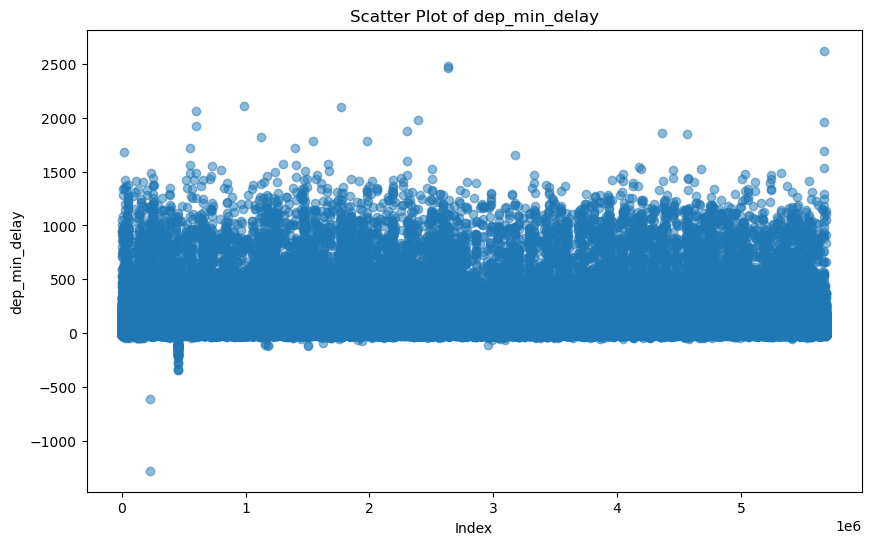

In [9]:
#let's review our values in dep_min_delay
print(df_flights_2018_clean['dep_min_delay'].value_counts())

#let's graph it to get a good image
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(df_flights_2018_clean.index, df_flights_2018_clean['dep_min_delay'], alpha=0.5)
plt.title('Scatter Plot of dep_min_delay')
plt.xlabel('Index')
plt.ylabel('dep_min_delay')
plt.show()

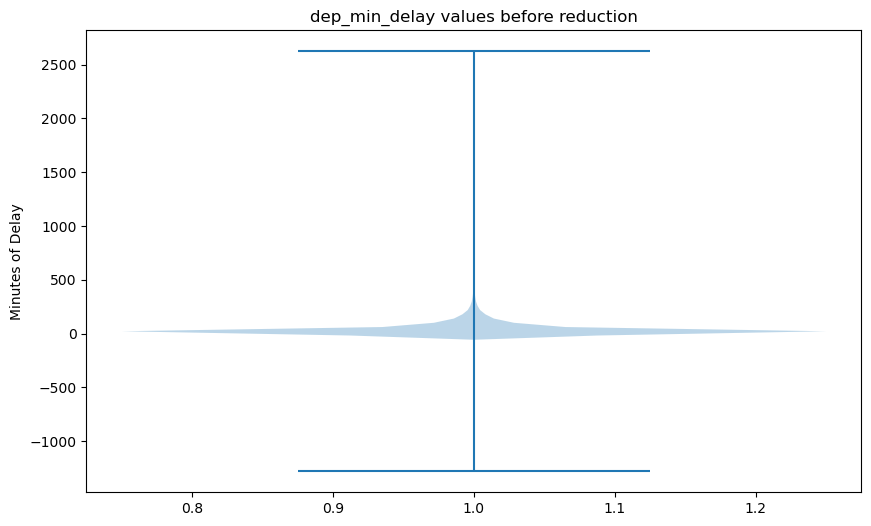

   Quarter  DayOfWeek            Airline Origin OriginState Dest DestState  \
0        1          2  Endeavor Air Inc.    ABY          GA  ATL        GA   
1        1          3  Endeavor Air Inc.    ABY          GA  ATL        GA   
2        1          4  Endeavor Air Inc.    ABY          GA  ATL        GA   
3        1          5  Endeavor Air Inc.    ABY          GA  ATL        GA   
4        1          6  Endeavor Air Inc.    ABY          GA  ATL        GA   

   Distance  dep_min_delay  Year  Month  Day  schedule_dep_hour  
0       145             -5  2018      1   23                 12  
1       145             -5  2018      1   24                 12  
2       145             -9  2018      1   25                 12  
3       145            -12  2018      1   26                 12  
4       145             -5  2018      1   27                 14  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572833 entries, 0 to 5689511
Data columns (total 13 columns):
 #   Column           

In [10]:
#let's visualize our values in a different form like a violin plot
plt.figure(figsize=(10, 6))  
plt.violinplot(df_flights_2018_clean.dep_min_delay)
plt.title('dep_min_delay values before reduction')
plt.ylabel('Minutes of Delay')
plt.show()

#this tells us that we need to reduce the range of potential target options for dep_min_delay. There are lots of range
#and the values are quite clustered together around the middle. Let's drop those values and try again

#we can see that we don't have that many rows in our data with very negative values in dep_min_delay. Let's drop those
df_flights_2018_active = df_flights_2018_clean[df_flights_2018_clean['dep_min_delay'] >= -100]
#we also see there are some outliers of very long delays. Let's remove those
df_flights_2018_active = df_flights_2018_active[df_flights_2018_active['dep_min_delay'] <= 500]


print(df_flights_2018_active.head())
print(df_flights_2018_active.info())

In [11]:
#we also want to make sure we only include flights with certain level of activity to remove outliers. Let's see how active our various airports are, 
#as well as get the mean value for comparison
sorted_origin_departures = df_flights_2018_clean.groupby('Origin').size().reset_index(name='DepartureCount').sort_values(by='DepartureCount', ascending=False)
print(sorted_origin_departures)
mean_departure_count = sorted_origin_departures['DepartureCount'].mean()
print(mean_departure_count)

#let's do the same for arrivals
sorted_dest_arrivals = df_flights_2018_clean.groupby('Dest').size().reset_index(name='ArrivalCount').sort_values(by='ArrivalCount', ascending=False)
print(sorted_dest_arrivals)
mean_arrival_count = sorted_dest_arrivals['ArrivalCount'].mean()
print(mean_arrival_count)

    Origin  DepartureCount
254    ORD          282770
92     DEN          249288
22     ATL          221242
193    LAX          181472
167    IAH          161187
..     ...             ...
364    WYS              52
96     DLG              31
13     AKN              31
145    GST              30
368    YNG               2

[370 rows x 2 columns]
15077.345945945946
    Dest  ArrivalCount
254  ORD        282130
92   DEN        248875
22   ATL        221544
193  LAX        181687
167  IAH        160930
..   ...           ...
364  WYS            52
96   DLG            31
13   AKN            31
145  GST            30
368  YNG             2

[370 rows x 2 columns]
15077.345945945946


In [12]:
#Filter by Activity Level
#We want to remove all origins that have a low number of departure counts. 
# Now that we know oure mean is about 15000, let's drop all origins that are less than
# 15000 flights in the year. We'll do the same for arrivals
#ORIGINS
min_departure_count = 15000
active_origins = sorted_origin_departures[sorted_origin_departures['DepartureCount'] > min_departure_count]['Origin'].tolist()
print(active_origins)
#DESTINATIONS
min_arrival_count = 15000
active_dest = sorted_dest_arrivals[sorted_dest_arrivals['ArrivalCount'] > min_arrival_count]['Dest'].tolist()
print(active_dest)


# now we are going to remove all rows from df_flights_2018_clean that haven an origin value that is not in this list of active_origins
#we'll rename this list as _active. Same for destinations
df_flights_2018_active = df_flights_2018_clean[df_flights_2018_clean['Origin'].isin(active_origins)]
df_flights_2018_active = df_flights_2018_active[df_flights_2018_active['Dest'].isin(active_dest)]

print(df_flights_2018_active.head())
print(df_flights_2018_active.info())

['ORD', 'DEN', 'ATL', 'LAX', 'IAH', 'SFO', 'EWR', 'LAS', 'SEA', 'DFW', 'PHX', 'MCO', 'BOS', 'CLT', 'DTW', 'LGA', 'BWI', 'MSP', 'FLL', 'IAD', 'JFK', 'DCA', 'MDW', 'PHL', 'SAN', 'SLC', 'DAL', 'PDX', 'STL', 'TPA', 'BNA', 'HOU', 'SJC', 'AUS', 'OAK', 'MCI', 'HNL', 'MSY', 'SMF', 'RDU', 'MIA', 'CLE', 'IND', 'PIT', 'SNA', 'CMH', 'CVG', 'SAT', 'MKE', 'BUR', 'RSW', 'JAX', 'OGG', 'ABQ', 'BDL', 'BUF', 'SJU', 'OMA', 'BOI', 'OKC', 'ONT', 'RIC', 'PBI', 'SDF', 'RNO', 'CHS', 'MEM', 'GEG', 'ORF', 'PVD', 'LGB']
['ORD', 'DEN', 'ATL', 'LAX', 'IAH', 'SFO', 'EWR', 'LAS', 'SEA', 'DFW', 'PHX', 'MCO', 'BOS', 'CLT', 'DTW', 'BWI', 'LGA', 'MSP', 'FLL', 'IAD', 'JFK', 'DCA', 'MDW', 'PHL', 'SAN', 'SLC', 'DAL', 'PDX', 'STL', 'TPA', 'BNA', 'HOU', 'SJC', 'AUS', 'OAK', 'MCI', 'HNL', 'SMF', 'MSY', 'RDU', 'MIA', 'CLE', 'IND', 'PIT', 'SNA', 'CMH', 'CVG', 'SAT', 'MKE', 'BUR', 'RSW', 'JAX', 'OGG', 'ABQ', 'BDL', 'BUF', 'SJU', 'OMA', 'BOI', 'OKC', 'ONT', 'RIC', 'PBI', 'SDF', 'RNO', 'CHS', 'MEM', 'GEG', 'ORF', 'PVD', 'LGB']
    

In [13]:
print(len(active_origins))
print(df_flights_2018_active.Origin.nunique())

71
71


In [14]:
#Filter by top origins
#we need to reduce the dataset further before modeling. 
#It currently includes all airports in the USA which is just too much to one hot encode. So we're going to reduce it down.

#1. Let's see which airports are the most common 
origin_counts = df_flights_2018_active['Origin'].value_counts()
top_origins = origin_counts.head(25)
print(top_origins)

ORD    177500
DEN    176090
LAX    161368
ATL    158481
SFO    132890
LAS    130826
EWR    122385
IAH    110667
BOS    109947
MCO    104923
PHX    104830
SEA    103167
BWI     85940
LGA     85632
DFW     85289
FLL     78795
MDW     78645
SAN     75873
JFK     74021
DTW     73455
DCA     72752
CLT     67875
MSP     66500
IAD     65249
PHL     61072
Name: Origin, dtype: int64


In [15]:
# filter by top destinations
# now let's get our top destinations
dest_counts = df_flights_2018_active['Dest'].value_counts()
top_dest = dest_counts.head(25)
print(top_dest)

ORD    177224
DEN    175612
LAX    161533
ATL    158639
SFO    132881
LAS    130946
EWR    122191
IAH    110443
BOS    110063
MCO    104775
PHX    104654
SEA    103048
BWI     85799
LGA     85434
DFW     84913
FLL     78760
MDW     78565
SAN     75887
JFK     73931
DTW     73622
DCA     72714
CLT     67769
MSP     66542
IAD     65212
PHL     61073
Name: Dest, dtype: int64


In [16]:
#Now that we have our list of top origins and destinations, we are going to reduce it further by only including these airports
#how many flights do we currently have in the dataset?
print(df_flights_2018_active.shape[0])
# we have about 2.2 million rows right now
# we only want to keep rows of data that either have an origin in our top list or destinations in our top list

#create the boolean conditions to compare to
origin_condition = df_flights_2018_active['Origin'].isin(top_origins.index)
dest_condition = df_flights_2018_active['Dest'].isin(top_dest.index)
#apply the filters
#df_flights_2018_active = df_flights_2018_active[origin_condition | dest_condition]
df_flights_2018_active = df_flights_2018_active[origin_condition]
reduced_1 = len(df_flights_2018_active)
df_flights_2018_active = df_flights_2018_active[dest_condition]
reduced_2 = len(df_flights_2018_active)

#now how many rows do we have?
print(df_flights_2018_active.shape[0])
print(df_flights_2018_active.Dest.nunique())

4029303


/tmp/ipykernel_21/3327973072.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_flights_2018_active = df_flights_2018_active[dest_condition]


1515479
25


In [17]:
# Display results 
print("Our original dataset had this many observations: " + str(original_length)) # original is 5.5 million rows
print("After filtering on origin airports, it's now: " 
      + str(reduced_1)) # after filtering origin 2.8 million rows
print("After filtering on destination airports, it's now: " 
      + str(reduced_2)) # now 1.1 million rows
print("\nWow, we reduced our dataset by around " + str(round(100 *(1 - (reduced_2/original_length)), 2)) + " percent!")

Our original dataset had this many observations: 5578618
After filtering on origin airports, it's now: 2564172
After filtering on destination airports, it's now: 1515479

Wow, we reduced our dataset by around 72.83 percent!


### Section 3: Exploratory Data Analysis (EDA)

In [18]:
#Let's check out what our new dataset looks like
#how many different airlines are represented?
print("Number of unique values for Airline:", df_flights_2018_active['Airline'].nunique())


Number of unique values for Airline: 23


In [19]:
#What does our geographic dispersion look like? Let's see how many different states are represented
print("Number of unique states in OriginState:", df_flights_2018_active['OriginState'].nunique())
#Good we have 51 states represented, that's some diversity.
print("Number of unique states in DestState:", df_flights_2018_active['OriginState'].nunique())
#51 as well for the Destinations. That's good as well

Number of unique states in OriginState: 18
Number of unique states in DestState: 18


In [20]:
#Let's visualize our states to see where the bulk of the data is coming from
origin_state_counts = df_flights_2018_active['OriginState'].value_counts()
print(origin_state_counts.head(10))
dest_state_counts = df_flights_2018_active['DestState'].value_counts()
print(dest_state_counts.head(10))

#We see here then that our rankings are the same, the top 10 origin states and top 10 departure states are the same. It makes sense since airlines use
#hub and spoke models and these hubs would be the busiest airports. This makes sense too since these are the most populated states in America

CA    237082
IL    138049
FL    118007
TX    117037
NY     95375
CO     92232
GA     88098
VA     81601
MA     76193
NV     71831
Name: OriginState, dtype: int64
CA    237568
IL    137977
FL    118000
TX    116782
NY     95322
CO     91663
GA     88217
VA     81690
MA     76294
NV     71966
Name: DestState, dtype: int64


<Figure size 800x600 with 0 Axes>

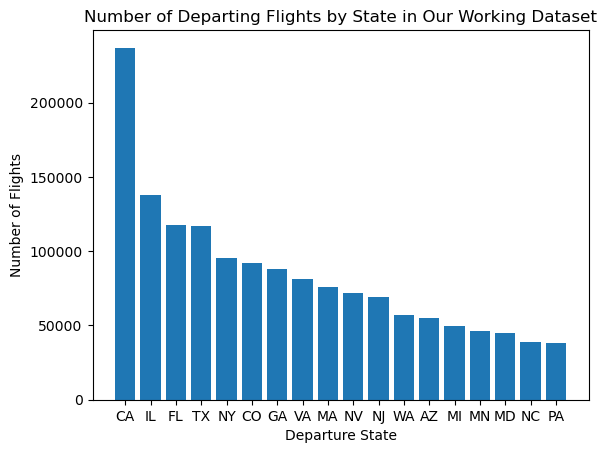

<Figure size 800x600 with 0 Axes>

In [21]:
# We feel that the values printed by the above cell are going to be a wide enough sample to 
# give us reliable results from our ML models. Now, let's explore our data a little bit.
# Firstly, let's visualize our states to see where the bulk of our data is coming from.

# Visualize most popular departure states
temp_df = df_flights_2018_active['OriginState'].value_counts().reset_index()

plt.bar(temp_df['index'], temp_df['OriginState'], width=0.8, align='center')
plt.xlabel("Departure State")
plt.ylabel("Number of Flights")
plt.title("Number of Departing Flights by State in Our Working Dataset")
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

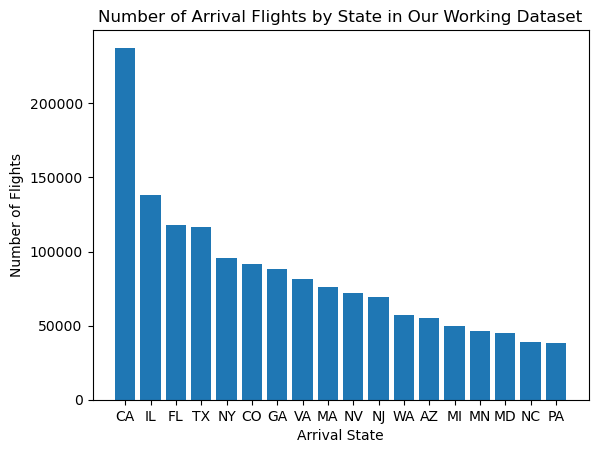

<Figure size 800x600 with 0 Axes>

In [22]:
# Visualize most popular destination states
temp_df2 = df_flights_2018_active['DestState'].value_counts().reset_index()

plt.bar(temp_df2['index'], temp_df2['DestState'], width=0.8, align='center')
plt.xlabel("Arrival State")
plt.ylabel("Number of Flights")
plt.title("Number of Arrival Flights by State in Our Working Dataset")
plt.figure(figsize=(8,6))

In [23]:
#Now let's see which airports have the most departure delays

#group by Origin and we want the dep_min_delay to get an average for all flights coming out of that airport
airport_delays = df_flights_2018_active.groupby('Origin')['dep_min_delay'].mean()

#now we sort by descending value to see the airports with the highest average delays in America!
airport_delays_sorted = airport_delays.sort_values(ascending=False)
print(airport_delays_sorted.head(20))


Origin
MDW    15.459763
EWR    14.866839
DFW    13.612801
MCO    13.483730
BOS    13.052498
ORD    12.839270
FLL    12.533830
LGA    12.443254
DEN    11.623504
BWI    11.301962
PHL    11.148356
CLT    10.890087
SFO    10.737475
ATL    10.735987
DCA    10.655947
JFK    10.652888
IAD    10.436509
PHX    10.110829
LAS    10.079436
IAH     9.877650
Name: dep_min_delay, dtype: float64


<Figure size 800x600 with 0 Axes>

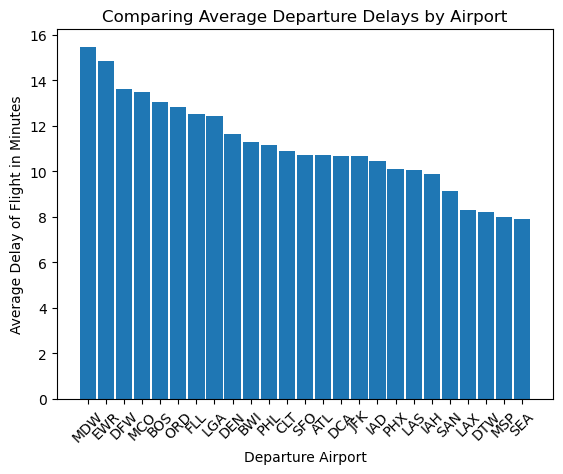

<Figure size 800x600 with 0 Axes>

In [24]:
# We now consider the question of which airports have the worst departure delays

airport_delays = df_flights_2018_active.groupby('Origin')['dep_min_delay'].mean().sort_values(ascending=False).reset_index()

plt.bar(airport_delays['Origin'], airport_delays['dep_min_delay'], width=.9, align='center')
plt.xlabel("Departure Airport")
plt.ylabel("Average Delay of Flight in Minutes")
plt.title("Comparing Average Departure Delays by Airport")
plt.xticks(rotation=45)
plt.figure(figsize=(8,6))

In [25]:
#let's see more about our airlines to see if there's a difference
flights_from_EWR = df_flights_2018_active[df_flights_2018_active['Origin'] == 'EWR']

#groupby airline and rank the average delay
EWR_delays = flights_from_EWR.groupby('Airline')['dep_min_delay'].mean()
print(EWR_delays.sort_values(ascending=False))

Airline
Commutair Aka Champlain Enterprises, Inc.    31.350067
JetBlue Airways                              25.567400
GoJet Airlines, LLC d/b/a United Express     19.441989
SkyWest Airlines Inc.                        18.765672
Southwest Airlines Co.                       17.662830
United Air Lines Inc.                        14.962770
Spirit Air Lines                             13.642779
ExpressJet Airlines Inc.                     13.604247
Endeavor Air Inc.                            13.151982
Delta Air Lines Inc.                          9.832812
Alaska Airlines Inc.                          8.835271
American Airlines Inc.                        8.583433
Republic Airlines                             8.278157
Virgin America                                6.675728
Envoy Air                                     5.500000
Name: dep_min_delay, dtype: float64


<Figure size 800x600 with 0 Axes>

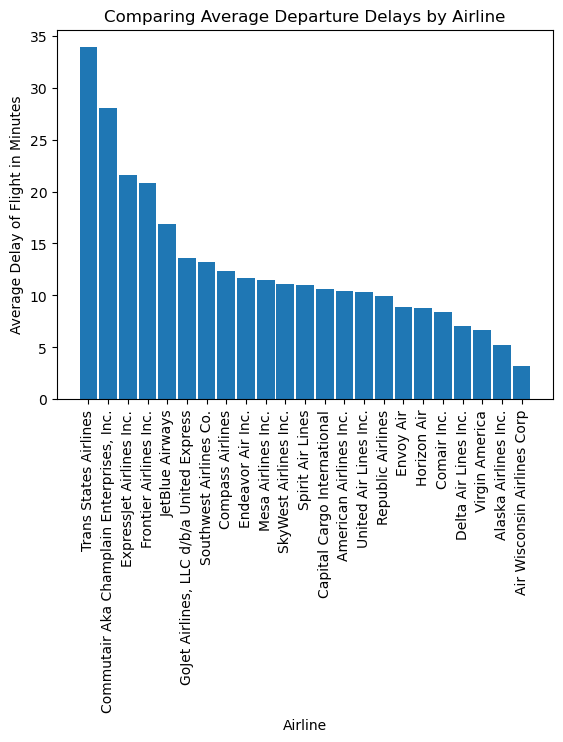

<Figure size 800x600 with 0 Axes>

In [26]:
# Now that we have identified the airport with the longest average delays, let's explore which airlines
# are responsible for the longest average delays.


airline_delays = df_flights_2018_active.groupby('Airline')['dep_min_delay'].mean().sort_values(ascending=False).reset_index()

plt.bar(airline_delays['Airline'], airline_delays['dep_min_delay'], width=.9, align='center')
plt.xlabel("Airline")
plt.ylabel("Average Delay of Flight in Minutes")
plt.title("Comparing Average Departure Delays by Airline")
plt.xticks(rotation=90)
plt.figure(figsize=(8,6))

In [27]:
# Now that we understand which airports and airlines tend to have the longest delays, let's see if there 
# is any correlation between the slowest airlines at Newark (the slowest airport) and the slowest
# airlines overall.

airline_delays_EWR = df_flights_2018_active[df_flights_2018_active['Origin'] == 'EWR'].groupby('Airline')['dep_min_delay'].mean().sort_values(ascending=False).reset_index()

pd.merge(airline_delays_EWR, airline_delays, how="inner", on='Airline').rename(columns={"dep_min_delay_y": "Avg_Delays_Overall", "dep_min_delay_x": "Avg_Delays_EWR"}).head(20)

,Airline,Avg_Delays_EWR,Avg_Delays_Overall
0,"Commutair Aka Champlain Enterprises, Inc.",31.350067,28.033772
1,JetBlue Airways,25.567400,16.911728
2,"GoJet Airlines, LLC d/b/a United Express",19.441989,13.598950
3,SkyWest Airlines Inc.,18.765672,11.134301
4,Southwest Airlines Co.,17.662830,13.213865
5,United Air Lines Inc.,14.962770,10.321730
6,Spirit Air Lines,13.642779,10.977962
7,ExpressJet Airlines Inc.,13.604247,21.566034
8,Endeavor Air Inc.,13.151982,11.717964
9,Delta Air Lines Inc.,9.832812,7.060366


In looking at how airlines tend to experience delays overall versus at Newark specifically, it actually seems that the airport itself might be having an effect. Of the 15 airlines addressed above, 11 perform worse with respect to delays at EWR, meaning that their delays are longer at this particular airport than they tend to be overall. In summary, we hope that you are not flying Commutair or JetBlue out of Newark any time soon!

### Section 4: Preparation for Modeling


In [28]:
#let's review the steps we've done
#reduced the number of features in the dataset
#renamed a number of features in the dataset
#rounded our target value
#removed outliers
#formatted date and time columns
#reduced our rows to active airports and frequently used origins and destinations


#First lets remind ourselves what our current dataset looks like
print(df_flights_2018_active.head())
print(df_flights_2018_active.info())

#we have about 1.4 million rows to work with in our remaining dataset

     Quarter  DayOfWeek            Airline Origin OriginState Dest DestState  \
182        1          1  Endeavor Air Inc.    DCA          VA  JFK        NY   
305        1          1  Endeavor Air Inc.    ATL          GA  IAH        TX   
365        1          2  Endeavor Air Inc.    DTW          MI  DFW        TX   
399        1          2  Endeavor Air Inc.    DTW          MI  LGA        NY   
452        1          3  Endeavor Air Inc.    DTW          MI  IAD        VA   

     Distance  dep_min_delay  Year  Month  Day  schedule_dep_hour  
182       213             49  2018      1    1                  9  
305       689            141  2018      1    1                 12  
365       986              7  2018      1    2                 15  
399       502             14  2018      1    2                 17  
452       383             -8  2018      1   10                  7  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515479 entries, 182 to 5689474
Data columns (total 13 column

In [29]:
#as a final step. let's copy our dataset for future use in the machine learning.
#this way we can check our results and come back to it later
#we'll make our v1 modeling dataset
df_flights_modeling_v1 = df_flights_2018_active.copy()
print(df_flights_modeling_v1.head())
print(df_flights_modeling_v1.info())

     Quarter  DayOfWeek            Airline Origin OriginState Dest DestState  \
182        1          1  Endeavor Air Inc.    DCA          VA  JFK        NY   
305        1          1  Endeavor Air Inc.    ATL          GA  IAH        TX   
365        1          2  Endeavor Air Inc.    DTW          MI  DFW        TX   
399        1          2  Endeavor Air Inc.    DTW          MI  LGA        NY   
452        1          3  Endeavor Air Inc.    DTW          MI  IAD        VA   

     Distance  dep_min_delay  Year  Month  Day  schedule_dep_hour  
182       213             49  2018      1    1                  9  
305       689            141  2018      1    1                 12  
365       986              7  2018      1    2                 15  
399       502             14  2018      1    2                 17  
452       383             -8  2018      1   10                  7  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515479 entries, 182 to 5689474
Data columns (total 13 column

#### Section 4.1: Encode "Airline"

In [30]:
#Prep for Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

#One hot encoding before modeling
#In order to effectively model, we need to one-hot-encode five values:
#"Airline" 
#"Origin" 
#"OriginState" 
#"Dest"
#"DestState"

#create an encoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)

#reshape the column 
airline_data = df_flights_modeling_v1[['Airline']]
airline_data_reshaped = airline_data.values.reshape(-1, 1)

#encode with fit_transform
encoded_airline = pd.DataFrame(encoder.fit_transform(airline_data_reshaped), columns=encoder.get_feature_names_out(['Airline']))

#concatenate bback with originl
df_flights_modeling_v1_encoded = pd.concat([df_flights_modeling_v1, encoded_airline], axis=1)

#drop the original airline column
df_flights_modeling_v1_encoded.drop(columns=['Airline'], inplace=True)

print(df_flights_modeling_v1_encoded.head())
print(df_flights_modeling_v1_encoded.info())


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     Quarter  DayOfWeek Origin OriginState Dest DestState  Distance  \
182      1.0        1.0    DCA          VA  JFK        NY     213.0   
305      1.0        1.0    ATL          GA  IAH        TX     689.0   
365      1.0        2.0    DTW          MI  DFW        TX     986.0   
399      1.0        2.0    DTW          MI  LGA        NY     502.0   
452      1.0        3.0    DTW          MI  IAD        VA     383.0   

     dep_min_delay    Year  Month  ...  Airline_Horizon Air  \
182           49.0  2018.0    1.0  ...                  0.0   
305          141.0  2018.0    1.0  ...                  0.0   
365            7.0  2018.0    1.0  ...                  0.0   
399           14.0  2018.0    1.0  ...                  0.0   
452           -8.0  2018.0    1.0  ...                  0.0   

     Airline_JetBlue Airways  Airline_Mesa Airlines Inc.  \
182                      0.0                         0.0   
305                      0.0                         0.0   
365           

#### Section 4.2: Encode "Origin"

In [31]:
#Great! One of our five categorical columns is encoded. Now lets do the last five.

encoder = OneHotEncoder(drop='first', sparse_output=False)
origin_data = df_flights_modeling_v1_encoded[['Origin']]
origin_data_reshaped = origin_data.values.reshape(-1, 1)
encoded_origin = pd.DataFrame(encoder.fit_transform(origin_data_reshaped), columns=encoder.get_feature_names_out(['Origin']))
df_flights_modeling_v1_encoded = pd.concat([df_flights_modeling_v1_encoded, encoded_origin], axis=1)
df_flights_modeling_v1_encoded.drop(columns=['Origin'], inplace=True)

print(df_flights_modeling_v1_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444649 entries, 182 to 2629572
Data columns (total 58 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   Quarter                                            float64
 1   DayOfWeek                                          float64
 2   OriginState                                        object 
 3   Dest                                               object 
 4   DestState                                          object 
 5   Distance                                           float64
 6   dep_min_delay                                      float64
 7   Year                                               float64
 8   Month                                              float64
 9   Day                                                float64
 10  schedule_dep_hour                                  float64
 11  Airline_Alaska Airlines Inc.                    

#### Section 4.3: Encode "OriginState"

In [32]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
origin_state_data = df_flights_modeling_v1_encoded[['OriginState']]
origin_state_data_reshaped = origin_state_data.values.reshape(-1, 1)
encoded_origin_state = pd.DataFrame(encoder.fit_transform(origin_state_data_reshaped), columns=encoder.get_feature_names_out(['OriginState']))
df_flights_modeling_v1_encoded = pd.concat([df_flights_modeling_v1_encoded, encoded_origin_state], axis=1)
df_flights_modeling_v1_encoded.drop(columns=['OriginState'], inplace=True)

print(df_flights_modeling_v1_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043370 entries, 182 to 3444646
Data columns (total 75 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   Quarter                                            float64
 1   DayOfWeek                                          float64
 2   Dest                                               object 
 3   DestState                                          object 
 4   Distance                                           float64
 5   dep_min_delay                                      float64
 6   Year                                               float64
 7   Month                                              float64
 8   Day                                                float64
 9   schedule_dep_hour                                  float64
 10  Airline_Alaska Airlines Inc.                       float64
 11  Airline_American Airlines Inc.                  

#### Section 4.4: Encode "Dest"

In [33]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
dest_data = df_flights_modeling_v1_encoded[['Dest']]
dest_data_reshaped = dest_data.values.reshape(-1, 1)
encoded_dest = pd.DataFrame(encoder.fit_transform(dest_data_reshaped), columns=encoder.get_feature_names_out(['Dest']))
df_flights_modeling_v1_encoded = pd.concat([df_flights_modeling_v1_encoded, encoded_dest], axis=1)
df_flights_modeling_v1_encoded.drop(columns=['Dest'], inplace=True)

print(df_flights_modeling_v1_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4482707 entries, 182 to 4043369
Data columns (total 99 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   Quarter                                            float64
 1   DayOfWeek                                          float64
 2   DestState                                          object 
 3   Distance                                           float64
 4   dep_min_delay                                      float64
 5   Year                                               float64
 6   Month                                              float64
 7   Day                                                float64
 8   schedule_dep_hour                                  float64
 9   Airline_Alaska Airlines Inc.                       float64
 10  Airline_American Airlines Inc.                     float64
 11  Airline_Capital Cargo International             

#### Section 4.5: Encode "DestState"

In [34]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
destState_data = df_flights_modeling_v1[['DestState']]
destState_data_reshaped = destState_data.values.reshape(-1, 1)
encoded_airline = pd.DataFrame(encoder.fit_transform(destState_data_reshaped), columns=encoder.get_feature_names_out(['DestState']))
df_flights_modeling_v1_encoded = pd.concat([df_flights_modeling_v1_encoded, encoded_airline], axis=1)
df_flights_modeling_v1_encoded.drop(columns=['DestState'], inplace=True)


print(df_flights_modeling_v1_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4482707 entries, 182 to 4043369
Columns: 115 entries, Quarter to DestState_WA
dtypes: float64(115)
memory usage: 3.9 GB
None


In [35]:
#we need to fill all the nan values as 0 to do linear regression. Otherwise we get an error because linear regression can't handle Nan
df_flights_modeling_v1_encoded = df_flights_modeling_v1_encoded.fillna(0)

In [36]:
#The last thing we need to do is prep our datasets! We need train and test values for x's and y's
#Our x value (input features) will be everything EXCEPT dep_min_delay
X = df_flights_modeling_v1_encoded.drop(columns=['dep_min_delay'])

#Our y values (prediction targets) will be the dep_min_delay value
y = df_flights_modeling_v1_encoded['dep_min_delay']

#We split training and testing with an 80% / 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


### Section 5: Linear Regression

We will initially do four linear regression comparisons across our data to see how each performs
1. Simple Linear Regression
2. L1 Lasso Regression
3. L2 Ridge Regression
4. Elastic Net Regression

We will get the MSE and the R^2 for each to compare

#### Section 5.1: Simple Linear Regression

In [37]:
#import model
from sklearn.linear_model import LinearRegression

#create the model
lr_model = LinearRegression()

#fit the model
lr_model.fit(X_train, y_train)

#make predictions on the X_test inputs
y_pred = lr_model.predict(X_test)

#get the mse using our model prediction values (y_pred) vs the actual y values (y_test)
mse = mean_squared_error(y_test, y_pred)

#get the r^2 the same way
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 643.2036914042943
R-squared: 0.05771829894955749


In [38]:
#MSE: 1060.573956012466
#R-squared: 0.04367785328314888
#Ok, so this model performs pretty poorly. While it's MSE is hard to interpret, an R^2 of 0.04 is pretty bad. Let's see if L1 regression is any better

#### Section 5.2: L1 Lasso Regression

In [39]:
#import model and tools
from sklearn.linear_model import Lasso

#create the alpha value and lasso_reg model
#set our initial alpha_value to 0.1
alpha_value = 0.1

#make the model
l1_model = Lasso(alpha=alpha_value)

#fit the model
l1_model.fit(X_train, y_train)

#make predictions
y_pred = l1_model.predict(X_test)

#get the mse and r^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 644.3614153528672
R-squared: 0.05602225443646347


In [40]:
#oh wow this model isn't much better

#### Section 5.3: L2 Ridge Regression

In [41]:
#import model
from sklearn.linear_model import Ridge

#create rr_model and set the alpha
alpha_value = 1.0
l2_model = Ridge(alpha=alpha_value)

# fit the model
l2_model.fit(X_train, y_train)

#make predictions
y_pred = l2_model.predict(X_test)

#get the mse and r^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 643.2037083536601
R-squared: 0.057718274119045065


In [42]:
#Yup not much better. We're going to really need to work on this dataset I think to make a decent model. Or try a different modeling approach

#### Section 5.4 Elastic Net Regression

In [43]:
#import model
from sklearn.linear_model import ElasticNet

#create en_model with alpha, L1_ratio
alpha = 1.0  
l1_ratio = 0.5  
en_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
en_model.fit(X_train, y_train)

#fit the model
en_model.fit(X_train, y_train)

#make predictions
y_pred = en_model.predict(X_test)

#get the mse and r^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Elastic Net Regression Model:")
print("MSE:", mse)
print("R-squared:", r2)

Elastic Net Regression Model:
MSE: 644.7792441565337
R-squared: 0.05541014284393342


#### Section 5.5: Summary of Findings

In [44]:
#Do the MSEs change across all four models?
#Do the R^2 change across all four models?
#Is one model clearly performing better? Why or why not?

### Section 6: Advanced Linear Regression

In [45]:
#Now we're going to do the same four models but at an advanced level with more tuning and tweaking
from sklearn.preprocessing import StandardScaler

#Section 6.0 Feature scaling to the dataset. We want to standardize/normalize the input features with probably StandardScaler (vs MinMaxScaler)
#build a scaler. 

#import our scaler
from sklearn.preprocessing import StandardScaler

#make a scaler and fit it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Get new datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

#### Section 6.1: Linear Regression w/ scaling and Cross-Validation

In [46]:
#fit_transform our dataset for modeling

#create the model
lr_model_2 = LinearRegression()

#fit the model
lr_model_2.fit(X_train, y_train)

#make predictions on the X_test inputs
y_pred = lr_model_2.predict(X_test)

#get the mse using our model prediction values (y_pred) vs the actual y values (y_test)
mse = mean_squared_error(y_test, y_pred)

#get the r^2 the same way
r2 = r2_score(y_test, y_pred)

print("MSE Part 2:", mse)
print("R-squared Part 2:", r2)

#Our model is getting worse...
#MSE Part 2: 484.6217494990029
#R-squared Part 2: 0.06399257779480028

MSE Part 2: 643.2090827330932
R-squared Part 2: 0.057710400750993984


#### Section 6.2: L1 Lasso Regression with scaling and cross validation

In [47]:
alpha_value = 0.1
l1_model_2 = Lasso(alpha=alpha_value)
l1_model_2.fit(X_train, y_train)
y_pred = l1_model_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("L1 Lasso")
print("MSE Part 2:", mse)
print("R-squared Part 2:", r2)

L1 Lasso
MSE Part 2: 644.3207341106541
R-squared Part 2: 0.05608185171587232


#### Section 6.3: L2 Ridge Regression with scaling and cross validation

In [48]:
alpha_value = 1.0
l2_model_2 = Ridge(alpha=alpha_value)
l2_model_2.fit(X_train, y_train)
y_pred = l2_model_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("L2 Ridge")
print("MSE Part 2:", mse)
print("R-squared Part 2:", r2)

L2 Ridge
MSE Part 2: 643.2036929111008
R-squared Part 2: 0.05771829674211337


#### Section 6.4 Elastic Net Regression with scaling and cross validation

In [49]:
alpha = 1.0  
l1_ratio = 0.5  
en_model_2 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
en_model_2.fit(X_train, y_train)
en_model_2.fit(X_train, y_train)
y_pred = en_model_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Elastic Net Regression Model:")
print("MSE Part 2:", mse)
print("R-squared Part 2:", r2)

Elastic Net Regression Model:
MSE Part 2: 650.5406527638928
R-squared Part 2: 0.046969784096712375


### Section 7: Let's try Light Gradient Boosted models

In [50]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

#put our params in a dict to reference
parameters = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'mse',
    'num_leaves': 200,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

#how many boosting rounds
num_round = 10 
model = lgb.train(parameters, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
print("LGB MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("LGB R-squared:", r2)

#We see a lot of progress using a LGB regressor, around 50% performance in R^2. The overall performance is still
#pretty bad, but we can see how this model is much more effective. We tried a variety of leave numbers (50, 100, 150, 200)
# and feature_fractions (0.7, 0.8, 0.9). 200 and 0.9 seem to work good and in a fast manner.

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.289960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 3586165, number of used features: 114
[LightGBM] [Info] Start training from score 3.767843
[1]	valid_0's l2: 672.802
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 662.764
[3]	valid_0's l2: 654.977
[4]	valid_0's l2: 647.998
[5]	valid_0's l2: 642.255
[6]	valid_0's l2: 637.745
[7]	valid_0's l2: 633.768
[8]	valid_0's l2: 630.66
[9]	valid_0's l2: 628.151
[10]	valid_0's l2: 625.196
Did not meet early stopping. Best iteration is:
[10]	valid_0's l2: 625.196
LGB MSE: 625.1958340164471
LGB R-squared: 0.08409948226436015


### Section 8: Decision Tree

In [51]:
#Let's try a decision tree model too and see what happens
from sklearn.tree import DecisionTreeRegressor
#make the regressor
regressor = DecisionTreeRegressor(random_state=11)
#fit
regressor.fit(X_train, y_train)
#predict
y_pred = regressor.predict(X_test)
#get performance values
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("Decision Tree R-squared:", r2)

#Oh wow this turns out horrible

Decision Tree MSE: 1108.019223125274
Decision Tree R-squared: -0.6232279949817812
